Jason Bard<br>
February 9, 2023<br>
DATA 3421-002<br>
<br>
# Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Please take a look at the data types and summary of our variables.

In [2]:
df = pd.read_csv("ClimateData.csv")
df

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [3]:
for i in range(df.shape[1]): print(df.columns[i]+': '+str(df[df.columns[i]].dtype))

id: int64
building_class: object
floor_area: float64
year_built: float64
precipitation_inches: float64
snowfall_inches: float64
avg_temp: float64
days_with_fog: float64
site_eui: float64


<b>Summary of Variables:</b><br>
`id`: Building ID<br>
`building_class`: Classification of Building<br>
`floor_area`: Square footage of floor area in bulding<br>
`year_built`: Year the building was built<br>
`precipitation_inches`: annual precipitation in inches at building location<br>
`snowfall_inches`: annual snowfall in inches at building location<br>
`avg_temp`: average temperature over a year at building location<br>
`days_with_fog`: number of days with fog at the location<br>
`site_eui`: Site Energy Usage Intensity. or the amount of heat and electricity used by the building

### 2. Summarize the number of unique values in each column.

In [4]:
df.nunique()

id                      75757
building_class              2
floor_area              20433
year_built                180
precipitation_inches      171
snowfall_inches            71
avg_temp                  173
days_with_fog              42
site_eui                17203
dtype: int64

### 3. Check all descriptive statistics for the Dataset.

In [5]:
df.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


### 4. Check the number of missing values.

In [6]:
df.isna().sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

### 5. Take care of missing data. You can decide to remove or use the imputation.

This is where we have to use our inuition. We can't just get rid of the `days_with_fog` column just because of majority of it is `NaN`. I believe we can reasonably assume that if a number was not recorded in this category, it should be replaced with `0.0`.


However, for `year_built`, such a solution would not be practical. In this case, since removing these buildings will leave 73920 data points (which is most of the original data), these values will be removed.

This is not a perfect system, as the `days_with_fog` category will shift its descriptive statistics quite a bit. However, given the assumption that most of the exclusions of numbers in the category are a result of no fog being there, I think it will be a reasonable estimation.

In [7]:
df_d = df.dropna(subset = ["year_built"])[df.year_built != 0.0]
df_d["days_with_fog"] = df_d["days_with_fog"].fillna(0)

/tmp/ipykernel_115/1826108294.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_d = df.dropna(subset = ["year_built"])[df.year_built != 0.0]
/tmp/ipykernel_115/1826108294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d["days_with_fog"] = df_d["days_with_fog"].fillna(0)


In [8]:
df_d

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,0.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,0.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,0.0,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,0.0,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,0.0,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,0.0,592.02


In [9]:
df_d.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,73914.000000,7.391400e+04,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000
mean,38474.927280,1.660749e+05,1952.465243,42.708309,29.462835,56.103960,43.687799,82.755166
std,21692.500511,2.440478e+05,32.613687,10.034281,17.656359,2.111161,62.527911,57.838336
min,0.000000,1.800000e+03,1600.000000,4.160000,0.000000,44.512329,0.000000,1.000000
25%,19721.250000,6.279000e+04,1927.000000,39.350000,9.600000,55.147541,0.000000,55.160000
50%,38687.500000,9.200000e+04,1951.000000,42.170000,33.700000,56.835616,0.000000,75.535000
75%,57255.750000,1.662600e+05,1977.000000,46.320000,49.100000,57.215847,99.000000,97.330000
max,75756.000000,6.353396e+06,2015.000000,107.690000,69.800000,63.398630,311.000000,997.870000


### 6. Find and remove duplicate variables.

There are no duplicate variables. There *are*, however, duplicate data points we can remove.

In [10]:
df_d = df_d[~df_d.drop(columns = ['id']).duplicated()]

In [11]:
df_d

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,0.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,0.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,0.0,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,0.0,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,0.0,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,0.0,592.02


### 7. Encode the categorical variables; you can use label encoding, one hot encoding, or...

We will use target encoding for the purposes of this lab. In normal circumstances (such as preparing data for DNN input), I would use one-hot encoding.

In [12]:
df_d.building_class.replace(["Commercial", "Residential"], [0,1], inplace=True)

/tmp/ipykernel_115/1787933930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d.building_class.replace(["Commercial", "Residential"], [0,1], inplace=True)


In [13]:
df_d

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,0,61242.0,1942.0,16.59,0.0,56.972603,0.0,248.68
1,1,0,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,0,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,0,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,0,66000.0,1985.0,16.59,0.0,56.972603,0.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,0,20410.0,1995.0,45.03,1.4,55.147541,0.0,132.92
75753,75753,1,40489.0,1910.0,45.03,1.4,55.147541,0.0,39.48
75754,75754,0,28072.0,1917.0,106.32,36.6,47.911202,0.0,48.40
75755,75755,0,53575.0,2012.0,106.32,36.6,47.911202,0.0,592.02


### 8. Create the boxplot and show the outlier.

<AxesSubplot: title={'center': 'Floor Area'}>

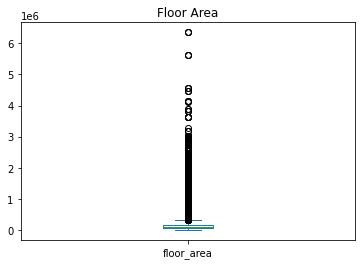

In [14]:
df_d['floor_area'].plot(kind='box', title='Floor Area')

<AxesSubplot: title={'center': 'Year Built'}>

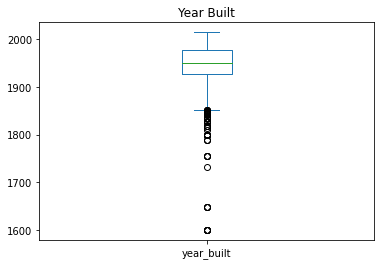

In [15]:
df_d['year_built'].plot(kind='box', title='Year Built')

<AxesSubplot: title={'center': 'Precipitation Inches'}>

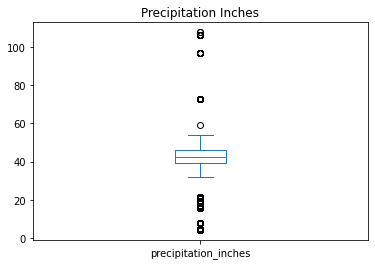

In [16]:
df_d['precipitation_inches'].plot(kind='box', title='Precipitation Inches')

<AxesSubplot: title={'center': 'Snowfall Inches'}>

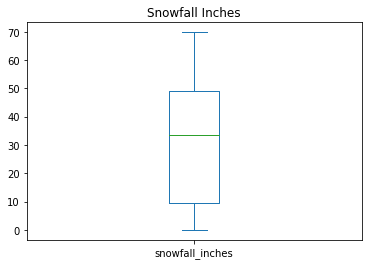

In [17]:
df_d['snowfall_inches'].plot(kind='box', title='Snowfall Inches')

<AxesSubplot: title={'center': 'Average Temperature'}>

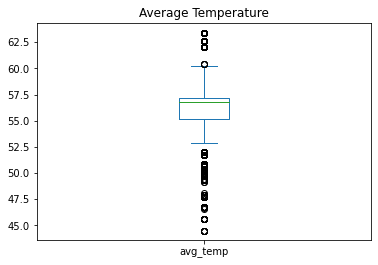

In [18]:
df_d['avg_temp'].plot(kind='box', title='Average Temperature')

<AxesSubplot: title={'center': 'Days With Fog'}>

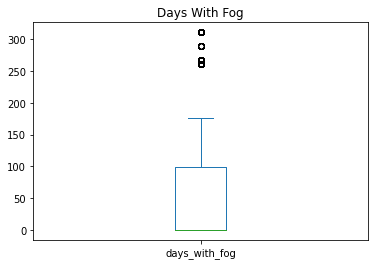

In [19]:
df_d['days_with_fog'].plot(kind='box', title='Days With Fog')

<AxesSubplot: title={'center': 'Site EUI'}>

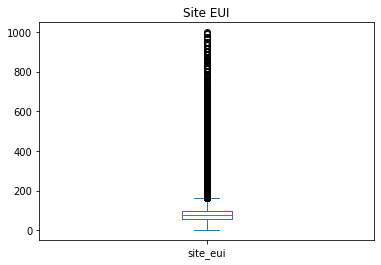

In [20]:
df_d['site_eui'].plot(kind='box', title='Site EUI')

### 9. Create the histogram and check the outliers.

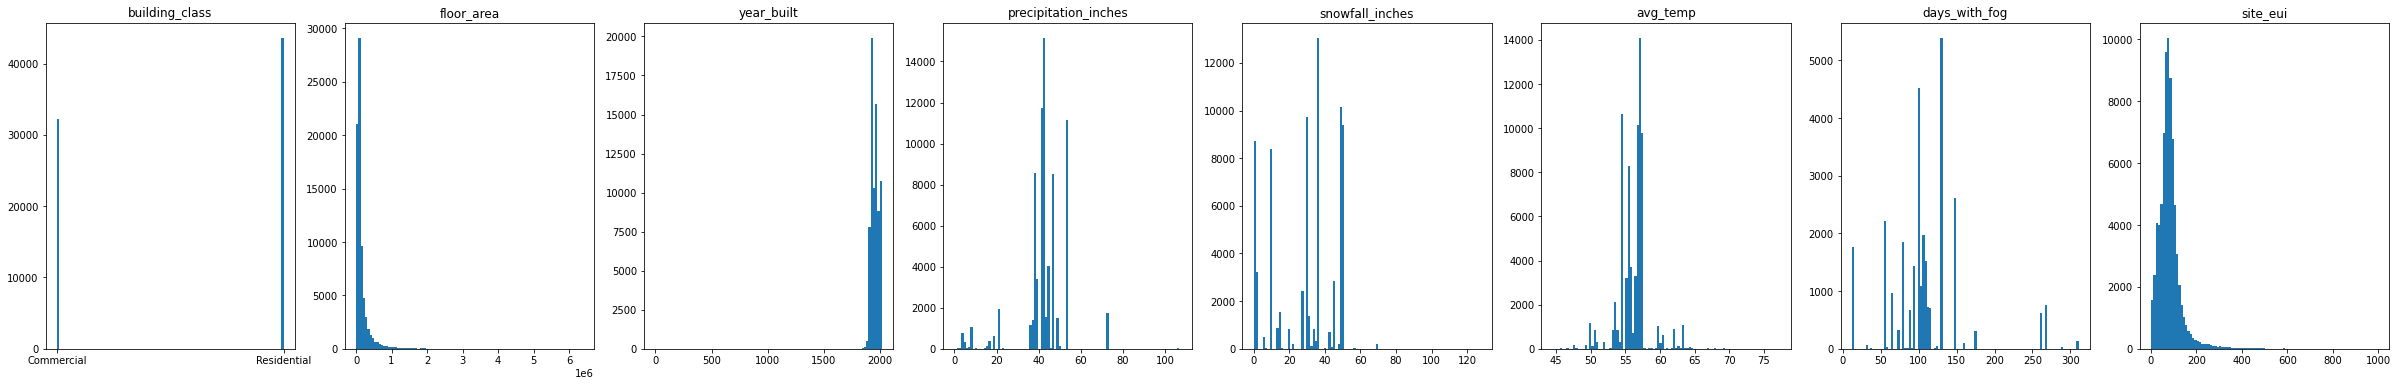

In [21]:
fig, axes = plt.subplots(1, 8, figsize=(42,6))

for i in range(df.shape[1]-1):
    axes[i].hist(df[df.columns[i+1]], bins=100)
    axes[i].set_title(df.columns[i+1])
    
plt.show()

#Feel free to right click the image below and view it in a new tab, because it should appear small just after being run
#in the Jupyter terminal. Still can't get the ticks to work for whatever reason.

### 10. If feature scaling is needed, do it, please.

Assigning each relevant column to its z-score appears to be helpful. At least the numbers will hopefully between -10 and 10 instead of being several orders of magnitude apart (hence outlining the usefulness of feature scaling).

In [22]:
for i in list(df_d.columns)[2:]:
    
    df_d[i] = (df_d[i] - np.mean(df_d[i])) / np.std(df_d[i])

/tmp/ipykernel_115/1043490303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d[i] = (df_d[i] - np.mean(df_d[i])) / np.std(df_d[i])


In [23]:
df_d

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,0,-0.429491,-0.320875,-2.602674,-1.668585,0.411482,-0.698620,2.872737
1,1,0,0.442248,0.077695,-2.602674,-1.668585,0.411482,-0.506708,-0.973601
2,2,0,0.466935,-0.044942,-2.602674,-1.668585,0.411482,-0.506708,-1.004935
3,3,0,-0.453734,0.844175,-2.602674,-1.668585,0.411482,-0.506708,-0.594299
4,4,0,-0.409995,0.997472,-2.602674,-1.668585,0.411482,-0.698620,-1.364848
...,...,...,...,...,...,...,...,...,...
75752,75752,0,-0.596793,1.304064,0.231439,-1.589295,-0.452893,-0.698620,0.868722
75753,75753,1,-0.514522,-1.301971,0.231439,-1.589295,-0.452893,-0.698620,-0.748893
75754,75754,0,-0.565399,-1.087356,6.339133,0.404280,-3.880124,-0.698620,-0.594472
75755,75755,0,-0.460905,1.825271,6.339133,0.404280,-3.880124,-0.698620,8.816574
